# ML: Recommender Systems-2

### Association Rules: Apriori Algorithm

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv("online_retail_ii.csv")
df.rename(columns = {'Invoice': 'InvoiceNo', 'Customer ID': 'CustomerID', 'Price': 'UnitPrice'}, inplace=True)
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
3    489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4    489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2009-12-01 07:45:00       6.95     13085.0  United Kingdom  
1  2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
2  2009-12-01 07:45:00       6.75     13085.0  United Kingdom  
3  2009-12-01 07:45:00       2.10     13085.0  United Kingdom  
4  2009-12-01 07:45:00       1.25     13085.0  United Kingdom

- Invoice number is same for the first 5 rows. All these items have been purchased on the same invoice.

In [7]:
df.describe()

Quantity     UnitPrice     CustomerID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.000000e+00  1.250000e+00   13975.000000
50%    3.000000e+00  2.100000e+00   15255.000000
75%    1.000000e+01  4.150000e+00   16797.000000
max    8.099500e+04  3.897000e+04   18287.000000

- Some transactions where quantity is negative and unit price is also negative.
- When customers return products or request refunds, these transactions can result in negative quantities in your inventory and negative prices on sales records. Retail systems often use negative quantities to track returned items.

In [8]:
df = df[df['Quantity']>=0]   # we don't want negative quantity.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044421 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   InvoiceNo    1044421 non-null  object 
 1   StockCode    1044421 non-null  object 
 2   Description  1042728 non-null  object 
 3   Quantity     1044421 non-null  int64  
 4   InvoiceDate  1044421 non-null  object 
 5   UnitPrice    1044421 non-null  float64
 6   CustomerID   805620 non-null   float64
 7   Country      1044421 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 71.7+ MB


In [9]:
df.dropna(axis=0, subset=['InvoiceNo'],inplace=True)
df['InvoiceNo']=df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]   # invoice that have 'c' in them are for testing, remove them.
df.shape

(1044420, 8)

There are duplicates here. We're gonna transpose the data.

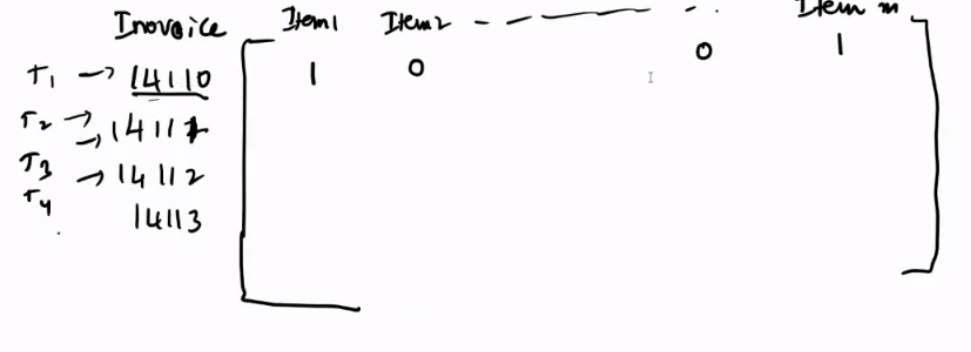

In [6]:
# we can't make common rules for each country. Eg. Some countries may have beer allowed, other may not.
df['Country'].value_counts()   

United Kingdom          961223
EIRE                     17354
Germany                  16703
France                   13941
Netherlands               5093
Spain                     3720
Switzerland               3137
Belgium                   3069
Portugal                  2562
Australia                 1815
Channel Islands           1569
Italy                     1468
Norway                    1437
Sweden                    1338
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    798
Unspecified                752
Greece                     657
Poland                     512
Japan                      485
United Arab Emirates       467
USA                        409
Israel                     369
Hong Kong                  358
Singapore                  339
Malta                      282
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        168
Bahrain 

In [11]:
# df[df['Country'] =="United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum()

InvoiceNo  Description                        
489434      WHITE CHERRY LIGHTS                   12
           15CM CHRISTMAS GLASS BALL 20 LIGHTS    12
           FANCY FONT HOME SWEET HOME DOORMAT     10
           PINK CHERRY LIGHTS                     12
           PINK DOUGHNUT TRINKET POT              24
                                                  ..
A516228    Adjust bad debt                         1
A528059    Adjust bad debt                         1
A563185    Adjust bad debt                         1
A563186    Adjust bad debt                         1
A563187    Adjust bad debt                         1
Name: Quantity, Length: 915320, dtype: int64

In [13]:
# df[df['Country'] =="United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack()

Description    DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
InvoiceNo                                                                     
489434                                       NaN                        NaN   
489435                                       NaN                        NaN   
489436                                       NaN                        NaN   
489437                                       NaN                        NaN   
489438                                       NaN                        NaN   
...                                          ...                        ...   
A516228                                      NaN                        NaN   
A528059                                      NaN                        NaN   
A563185                                      NaN                        NaN   
A563186                                      NaN                        NaN   
A563187                                      NaN                        NaN   

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
489434                                  NaN                             NaN   
489435                                  NaN                             NaN   
489436                                  NaN                             NaN   
489437                                  NaN                             NaN   
489438                                  NaN                             NaN   
...                                     ...                             ...   
A516228                                 NaN                             NaN   
A528059                                 NaN                             NaN   
A563185                                 NaN                             NaN   
A563186                                 NaN                             NaN   
A563187                                 NaN                             NaN   

Description   ANIMAL STICKERS   BLACK PIRATE TREASURE CHEST  \
InvoiceNo                                                     
489434                    NaN                           NaN   
489435                    NaN                           NaN   
489436                    NaN                           NaN   
489437                    NaN                           NaN   
489438                    NaN                           NaN   
...                       ...                           ...   
A516228                   NaN                           NaN   
A528059                   NaN                           NaN   
A563185                   NaN                           NaN   
A563186                   NaN                           NaN   
A563187                   NaN                           NaN   

Description   BROWN  PIRATE TREASURE CHEST    Bank Charges  \
InvoiceNo                                                    
489434                                  NaN            NaN   
489435                                  NaN            NaN   
489436                                  NaN            NaN   
489437                                  NaN            NaN   
489438                                  NaN            NaN   
...                                     ...            ...   
A516228                                 NaN            NaN   
A528059                                 NaN            NaN   
A563185                                 NaN            NaN   
A563186                                 NaN            NaN   
A563187                                 NaN            NaN   

Description   CAMPHOR WOOD PORTOBELLO MUSHROOM  \
InvoiceNo                                        
489434                                     NaN   
489435                                     NaN   
489436                                     NaN   
489437                                     NaN   
489438           

In [15]:
# df[df['Country'] =="United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index()

Description InvoiceNo    DOORMAT UNION JACK GUNS AND ROSES  \
0              489434                                  NaN   
1              489435                                  NaN   
2              489436                                  NaN   
3              489437                                  NaN   
4              489438                                  NaN   
...               ...                                  ...   
36753         A516228                                  NaN   
36754         A528059                                  NaN   
36755         A563185                                  NaN   
36756         A563186                                  NaN   
36757         A563187                                  NaN   

Description   3 STRIPEY MICE FELTCRAFT   4 PURPLE FLOCK DINNER CANDLES  \
0                                  NaN                             NaN   
1                                  NaN                             NaN   
2                                  NaN                             NaN   
3                                  NaN                             NaN   
4                                  NaN                             NaN   
...                                ...                             ...   
36753                              NaN                             NaN   
36754                              NaN                             NaN   
36755                              NaN                             NaN   
36756                              NaN                             NaN   
36757                              NaN                             NaN   

Description   50'S CHRISTMAS GIFT BAG LARGE   ANIMAL STICKERS  \
0                                       NaN               NaN   
1                                       NaN               NaN   
2                                       NaN               NaN   
3                                       NaN               NaN   
4                                       NaN               NaN   
...                                     ...               ...   
36753                                   NaN               NaN   
36754                                   NaN               NaN   
36755                                   NaN               NaN   
36756                                   NaN               NaN   
36757                                   NaN               NaN   

Description   BLACK PIRATE TREASURE CHEST   BROWN  PIRATE TREASURE CHEST   \
0                                     NaN                             NaN   
1                                     NaN                             NaN   
2                                     NaN                             NaN   
3                                     NaN                             NaN   
4                                     NaN                             NaN   
...                                   ...                             ...   
36753                                 NaN                             NaN   
36754                                 NaN                             NaN   
36755                                 NaN                             NaN   
36756                                 NaN                             NaN   
36757                                 NaN                             NaN   

Description   Bank Charges   CAMPHOR WOOD PORTOBELLO MUSHROOM  ...  \
0                      NaN                                NaN  ...   
1                      NaN                                NaN  ...   
2                      NaN                                NaN  ...   
3                      NaN                                NaN  ...   
4                      NaN                                NaN  ...   
...                    ...                                ...  ...   
36753                  NaN                                NaN  ...   
36754                  NaN                                NaN  ...   
36755                  NaN    

In [17]:
data = (df[df['Country'] =="United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity']
               .sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
data.head(2)

Description    DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
InvoiceNo                                                                     
489434                                       0.0                        0.0   
489435                                       0.0                        0.0   

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
489434                                  0.0                             0.0   
489435                                  0.0                             0.0   

Description   ANIMAL STICKERS   BLACK PIRATE TREASURE CHEST  \
InvoiceNo                                                     
489434                    0.0                           0.0   
489435                    0.0                           0.0   

Description   BROWN  PIRATE TREASURE CHEST    Bank Charges  \
InvoiceNo                                                    
489434                                  0.0            0.0   
489435                                  0.0            0.0   

Description   CAMPHOR WOOD PORTOBELLO MUSHROOM  \
InvoiceNo                                        
489434                                     0.0   
489435                                     0.0   

Description   CHERRY BLOSSOM  DECORATIVE FLASK  ...  tk maxx mix up with pink  \
InvoiceNo                                       ...                             
489434                                     0.0  ...                       0.0   
489435                                     0.0  ...                       0.0   

Description  to push order througha s stock was   update  website fixed  \
InvoiceNo                                                                 
489434                                       0.0     0.0            0.0   
489435                                       0.0     0.0            0.0   

Description  wrong invc  wrongly coded 20713  wrongly coded 23343  \
InvoiceNo                                                           
489434              0.0                  0.0                  0.0   
489435              0.0                  0.0                  0.0   

Description  wrongly marked  wrongly marked 23343  \
InvoiceNo                                           
489434                  0.0                   0.0   
489435                  0.0                   0.0   

Description  wrongly sold (22719) barcode  
InvoiceNo                                  
489434                                0.0  
489435                                0.0  

[2 rows x 5439 columns]

In [18]:
data.shape   # Compute heavy. It has to compute (2^5439) - 1 combinations and compute support for each combination.

(36758, 5439)

These values are quantities. We want binary values. We're not gonna recommend the quantity of products as well.

In [19]:
data = (data > 0).astype(int)   # converting to binary. If quantity > 0 -> True -> convert to int -> 1
data

Description    DOORMAT UNION JACK GUNS AND ROSES   3 STRIPEY MICE FELTCRAFT  \
InvoiceNo                                                                     
489434                                         0                          0   
489435                                         0                          0   
489436                                         0                          0   
489437                                         0                          0   
489438                                         0                          0   
...                                          ...                        ...   
A516228                                        0                          0   
A528059                                        0                          0   
A563185                                        0                          0   
A563186                                        0                          0   
A563187                                        0                          0   

Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
489434                                    0                               0   
489435                                    0                               0   
489436                                    0                               0   
489437                                    0                               0   
489438                                    0                               0   
...                                     ...                             ...   
A516228                                   0                               0   
A528059                                   0                               0   
A563185                                   0                               0   
A563186                                   0                               0   
A563187                                   0                               0   

Description   ANIMAL STICKERS   BLACK PIRATE TREASURE CHEST  \
InvoiceNo                                                     
489434                      0                             0   
489435                      0                             0   
489436                      0                             0   
489437                      0                             0   
489438                      0                             0   
...                       ...                           ...   
A516228                     0                             0   
A528059                     0                             0   
A563185                     0                             0   
A563186                     0                             0   
A563187                     0                             0   

Description   BROWN  PIRATE TREASURE CHEST    Bank Charges  \
InvoiceNo                                                    
489434                                    0              0   
489435                                    0              0   
489436                                    0              0   
489437                                    0              0   
489438                                    0              0   
...                                     ...            ...   
A516228                                   0              0   
A528059                                   0              0   
A563185                                   0              0   
A563186                                   0              0   
A563187                                   0              0   

Description   CAMPHOR WOOD PORTOBELLO MUSHROOM  \
InvoiceNo                                        
489434                                       0   
489435                                       0   
489436                                       0   
489437                                       0   
489438           

In [ ]:
# pip install mlxtend  

In [22]:
from mlxtend.frequent_patterns import apriori

In [27]:
# apriori(data, min_support=0.02, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

support                              itemsets
0    0.142989  (WHITE HANGING HEART T-LIGHT HOLDER)
1    0.093612            (REGENCY CAKESTAND 3 TIER)
2    0.082975             (JUMBO BAG RED RETROSPOT)
3    0.072039       (ASSORTED COLOUR BIRD ORNAMENT)
4    0.068992                       (PARTY BUNTING)
..        ...                                   ...
259  0.020104              (LAUNDRY 15C METAL SIGN)
260  0.020050      (RED STRIPE CERAMIC DRAWER KNOB)
261  0.020050          (PICNIC BASKET WICKER LARGE)
262  0.020050     (BLUE STRIPE CERAMIC DRAWER KNOB)
263  0.020023           (I'M ON HOLIDAY METAL SIGN)

[264 rows x 2 columns]

In [29]:
ans = apriori(data, min_support=0.02, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)['itemsets']
type(ans[0])

frozenset

In [26]:
# Step 1. Frequent itemsets

# if we don't say "use_colnames=True", it'll replace them with indexes 0,1,2.
# min_support=0.02 means out of 36758 transactions, 
# if a combination is present in more than 2% of the transactions, I want that combination.
# that would be a very popular combination here as it would be very very rare as it's a fancy store. 
# It doesn't have eggs and milk kind of combinations that would repeatedly happen.
frequent_itemsets_plus = apriori(data, min_support=0.02, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))   # getting the length of the itemset

frequent_itemsets_plus

support                              itemsets  length
0    0.142989  (WHITE HANGING HEART T-LIGHT HOLDER)       1
1    0.093612            (REGENCY CAKESTAND 3 TIER)       1
2    0.082975             (JUMBO BAG RED RETROSPOT)       1
3    0.072039       (ASSORTED COLOUR BIRD ORNAMENT)       1
4    0.068992                       (PARTY BUNTING)       1
..        ...                                   ...     ...
259  0.020104              (LAUNDRY 15C METAL SIGN)       1
260  0.020050      (RED STRIPE CERAMIC DRAWER KNOB)       1
261  0.020050          (PICNIC BASKET WICKER LARGE)       1
262  0.020050     (BLUE STRIPE CERAMIC DRAWER KNOB)       1
263  0.020023           (I'M ON HOLIDAY METAL SIGN)       1

[264 rows x 3 columns]

In [24]:
frequent_itemsets_plus.loc[frequent_itemsets_plus.length==2]    # now we only have frequent itemsets

support                                           itemsets  length
72   0.031966  (RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI...       2
90   0.029653  (WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...       2
100  0.028783  (JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)       2
122  0.026960  (STRAWBERRY CERAMIC TRINKET BOX, SWEETHEART CE...       2
123  0.026933     (HEART OF WICKER LARGE, HEART OF WICKER SMALL)       2
127  0.026525  (JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...       2
141  0.025464  (ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...       2
145  0.025029  (JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...       2
151  0.024484    (JUMBO BAG STRAWBERRY, JUMBO BAG RED RETROSPOT)       2
155  0.024267  (JUMBO  BAG BAROQUE BLACK WHITE, JUMBO BAG RED...       2
161  0.023913  (JUMBO STORAGE BAG SUKI, JUMBO SHOPPER VINTAGE...       2
172  0.023124     (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL.)       2
178  0.022961  (HOME BUILDING BLOCK WORD, LOVE BUILDING BLOCK...       2
179  0.022961  (LUNCH BAG  BLACK SKULL., LUNCH BAG SPACEBOY D...       2
180  0.022771  (60 TEATIME FAIRY CAKE CASES, PACK OF 60 PINK ...       2
188  0.022471  (WOODEN FRAME ANTIQUE WHITE , WHITE HANGING HE...       2
190  0.022444  (WHITE HANGING HEART T-LIGHT HOLDER, WOODEN PI...       2
194  0.022335  (PAPER CHAIN KIT 50'S CHRISTMAS , PAPER CHAIN ...       2
220  0.021329      (LUNCH BAG WOODLAND, LUNCH BAG  BLACK SKULL.)       2
222  0.021193  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...       2
228  0.021029  (JUMBO  BAG BAROQUE BLACK WHITE, JUMBO STORAGE...       2
236  0.020730  (WHITE HANGING HEART T-LIGHT HOLDER, HEART OF ...       2
240  0.020594  (WHITE HANGING HEART T-LIGHT HOLDER, HEART OF ...       2
241  0.020567  (LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIGN )       2
250  0.020349          (LUNCH BAG WOODLAND, LUNCH BAG CARS BLUE)       2
252  0.020322  (HOT WATER BOTTLE TEA AND SYMPATHY, CHOCOLATE ...       2
254  0.020186     (JUMBO BAG STRAWBERRY, JUMBO STORAGE BAG SUKI)       2
257  0.020159  (ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...       2
258  0.020159  (VINTAGE SNAP CARDS, VINTAGE HEADS AND TAILS C...       2

##### Metrics: Confidence and Lift

In [30]:
# apriori created the frequent itemsets. Now, we pass it to the association rule mining engine here. 

from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets_plus, metric ="lift", min_threshold = 1)  # lift of atleast 1.
rules.head()

antecedents                           consequents  \
0    (RED HANGING HEART T-LIGHT HOLDER)  (WHITE HANGING HEART T-LIGHT HOLDER)   
1  (WHITE HANGING HEART T-LIGHT HOLDER)    (RED HANGING HEART T-LIGHT HOLDER)   
2         (WOODEN FRAME ANTIQUE WHITE )   (WOODEN PICTURE FRAME WHITE FINISH)   
3   (WOODEN PICTURE FRAME WHITE FINISH)         (WOODEN FRAME ANTIQUE WHITE )   
4              (JUMBO STORAGE BAG SUKI)             (JUMBO BAG RED RETROSPOT)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.045514            0.142989  0.031966    0.702331   4.911775   
1            0.142989            0.045514  0.031966    0.223554   4.911775   
2            0.054410            0.053158  0.029653    0.545000  10.252359   
3            0.053158            0.054410  0.029653    0.557830  10.252359   
4            0.060640            0.082975  0.028783    0.474652   5.720416   

   leverage  conviction  zhangs_metric  
0  0.025458    2.879074       0.834384  
1  0.025458    1.229301       0.929285  
2  0.026761    2.080970       0.954390  
3  0.026761    2.138522       0.953128  
4  0.023751    1.745558       0.878457

- antecedent -> consequent
- In row 1, when "WHITE HANGING HEART T-LIGHT HOLDER" is in the basket, shall I recommend "RED HANGING HEART T-LIGHT HOLDER"
- Lift(4.9) says we can recommend it. But, confidence is 0.22 (not that great.)
- In row 0, when "RED HANGING HEART T-LIGHT HOLDER" is in the basket, shall I recommend "WHITE HANGING HEART T-LIGHT HOLDER".
- Lift(4.9) is good and confidence(0.7) is also good. So, yes.

In [31]:
# apriori created the frequent itemsets. Now, we pass it to the association rule mining engine here. 

from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets_plus, metric ="confidence", min_threshold = 0.5)
rules.head()

antecedents                           consequents  \
0   (RED HANGING HEART T-LIGHT HOLDER)  (WHITE HANGING HEART T-LIGHT HOLDER)   
1        (WOODEN FRAME ANTIQUE WHITE )   (WOODEN PICTURE FRAME WHITE FINISH)   
2  (WOODEN PICTURE FRAME WHITE FINISH)         (WOODEN FRAME ANTIQUE WHITE )   
3     (SWEETHEART CERAMIC TRINKET BOX)      (STRAWBERRY CERAMIC TRINKET BOX)   
4              (HEART OF WICKER LARGE)               (HEART OF WICKER SMALL)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.045514            0.142989  0.031966    0.702331   4.911775   
1            0.054410            0.053158  0.029653    0.545000  10.252359   
2            0.053158            0.054410  0.029653    0.557830  10.252359   
3            0.038305            0.058463  0.026960    0.703835  12.038890   
4            0.052614            0.057185  0.026933    0.511892   8.951543   

   leverage  conviction  zhangs_metric  
0  0.025458    2.879074       0.834384  
1  0.026761    2.080970       0.954390  
2  0.026761    2.138522       0.953128  
3  0.024721    3.179097       0.953458  
4  0.023924    1.931573       0.937620

In [16]:
rules

antecedents  \
0     (RED HANGING HEART T-LIGHT HOLDER)   
1    (WOODEN PICTURE FRAME WHITE FINISH)   
2          (WOODEN FRAME ANTIQUE WHITE )   
3       (SWEETHEART CERAMIC TRINKET BOX)   
4                (HEART OF WICKER LARGE)   
5     (ROSES REGENCY TEACUP AND SAUCER )   
6      (GREEN REGENCY TEACUP AND SAUCER)   
7              (JUMBO BAG PINK POLKADOT)   
8                 (JUMBO BAG STRAWBERRY)   
9             (LOVE BUILDING BLOCK WORD)   
10   (PAPER CHAIN KIT VINTAGE CHRISTMAS)   
11     (GREEN REGENCY TEACUP AND SAUCER)   
12      (PINK REGENCY TEACUP AND SAUCER)   
13           (ALARM CLOCK BAKELIKE RED )   
14          (ALARM CLOCK BAKELIKE GREEN)   
15  (VINTAGE HEADS AND TAILS CARD GAME )   

                             consequents  antecedent support  \
0   (WHITE HANGING HEART T-LIGHT HOLDER)            0.045514   
1          (WOODEN FRAME ANTIQUE WHITE )            0.053158   
2    (WOODEN PICTURE FRAME WHITE FINISH)            0.054410   
3       (STRAWBERRY CERAMIC TRINKET BOX)            0.038305   
4                (HEART OF WICKER SMALL)            0.052614   
5      (GREEN REGENCY TEACUP AND SAUCER)            0.034550   
6     (ROSES REGENCY TEACUP AND SAUCER )            0.033598   
7              (JUMBO BAG RED RETROSPOT)            0.037407   
8              (JUMBO BAG RED RETROSPOT)            0.048615   
9             (HOME BUILDING BLOCK WORD)            0.045024   
10     (PAPER CHAIN KIT 50'S CHRISTMAS )            0.037543   
11      (PINK REGENCY TEACUP AND SAUCER)            0.033598   
12     (GREEN REGENCY TEACUP AND SAUCER)            0.025573   
13          (ALARM CLOCK BAKELIKE GREEN)            0.033108   
14           (ALARM CLOCK BAKELIKE RED )            0.031095   
15                  (VINTAGE SNAP CARDS)            0.032537   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.142989  0.031966    0.702331   4.911775  0.025458    2.879074  
1             0.054410  0.029653    0.557830  10.252359  0.026761    2.138522  
2             0.053158  0.029653    0.545000  10.252359  0.026761    2.080970  
3             0.058463  0.026960    0.703835  12.038890  0.024721    3.179097  
4             0.057185  0.026933    0.511892   8.951543  0.023924    1.931573  
5             0.033598  0.025464    0.737008  21.935980  0.024303    3.674642  
6             0.034550  0.025464    0.757895  21.935980  0.024303    3.987727  
7             0.082975  0.025029    0.669091   8.063752  0.021925    2.771229  
8             0.082975  0.024484    0.503637   6.069739  0.020451    1.847490  
9             0.054437  0.022961    0.509970   9.368051  0.020510    1.929601  
10            0.053349  0.022335    0.594928  11.151630  0.020332    2.336992  
11            0.025573  0.021193    0.630769  24.665761  0.020333    2.639074  
12            0.033598  0.021193    0.828723  24.665761  0.020333    5.642346  
13            0.031095  0.020159    0.608874  19.580928  0.019129    2.477221  
14            0.033108  0.020159    0.648294  19.580928  0.019129    2.749147  
15            0.048615  0.020159    0.619565  12.744252  0.018577    2.500783

- Confidence is more important.
- Start with checking confidence and then check if lift is good too. Then, you can bundle them together.

3% support means that combination occurs in 3% of the total transactions. This is a good combination to bundle up since in ecommerce, millions of transactions happen. 3% is a very frequent combination. Then, we look at confidence and lift.

- Lastly, we should also have some business rules. Like, if a `$`100 product is in the cart, can you ask to add `$`500 product in the cart? No!

If you have any questions, get in touch with me [**here**](https://linktr.ee/khushalkumar31)